# Week 1 - Tasks

- **Data Source:** `yfinance`
- **Assets:** `AAPL`, `MSFT`, `GOOG`, `AMZN`, `TSLA` (and `NVDA` for Task 5)
- **Timeframes:**
  * **Long Term:** `start="2015-01-01", end="2024-01-01"`
  * **Medium Term:** `start="2020-01-01", end="2024-01-01"` (Includes COVID crash)

The goal for this week is to gain familiarity with financial data, analyze common trends, learn standard library functions, and touch upon the underlying theory.

In [116]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Task 1 - Setup
* Fetch **Long Term** historical data for the 5 assets.
* Extract the `Adjusted Close` values.
    * *Note: Check for missing values or empty rows and handle them (drop or fill).*
* Use `df.describe()` to extract key summary statistics.
* Extract the **Medium Term** data as well for later tasks.

In [55]:
tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA"]

data_long = yf.download(tickers, start="2015-01-01", end="2024-01-01", auto_adjust=False)
data_long_adj_close = data_long['Adj Close']
prices_long = data_long_adj_close.ffill().bfill()

data_med = yf.download(tickers, start="2020-01-01", end="2024-01-01", auto_adjust=False)
data_med_adj_close = data_med['Adj Close']
prices_mid = data_med_adj_close.ffill().bfill()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [56]:
stats_long = prices_long.describe()
stats_med = prices_mid.describe()

## Task 2 - Basic Trends
* Select **one asset** and using the **Medium Term** data, compute:
    * **Returns:** 1-day, 5-day, and 20-day simple returns.
    * **Log Returns:** 1-day, 5-day, and 20-day log returns.
    * **Volatility:** 5-day, 20-day, and 60-day rolling standard deviation (volatility) of the log returns.
* **Plotting:**
    * Plot the price and the 20-day moving average on one chart.
    * Plot the 1-day log returns on a separate chart.
    * Plot the rolling volatilities on a third chart.
    * *Analysis:* What trends do you observe? Does high volatility correlate with price drops?

* **Bonus (Long Term Data):**
    * Create a scatter plot of `|Daily Return|` vs `Volume`. Is there a relationship?
    * Group returns and volatility by **Month** (e.g., all Januaries, all Februaries) and plot the averages. Is there a "seasonal" effect?

In [57]:
#Chosen asset is GOOG
prices = prices_mid["GOOG"]

returns = pd.DataFrame({
    "1-day": prices.pct_change(1),
    "5-day": prices.pct_change(5),
    "20-day": prices.pct_change(20)
}).dropna()

log_returns = pd.DataFrame({
    "1-day": np.log(prices).diff(1),
    "5-day": np.log(prices).diff(5),
    "20-day": np.log(prices).diff(20)
}).dropna()

volatility = pd.DataFrame({
    "5-day": log_returns["1-day"].rolling(5).std(),
    "20-day": log_returns["1-day"].rolling(20).std(),
    "60-day": log_returns["1-day"].rolling(60).std(),
}).dropna()

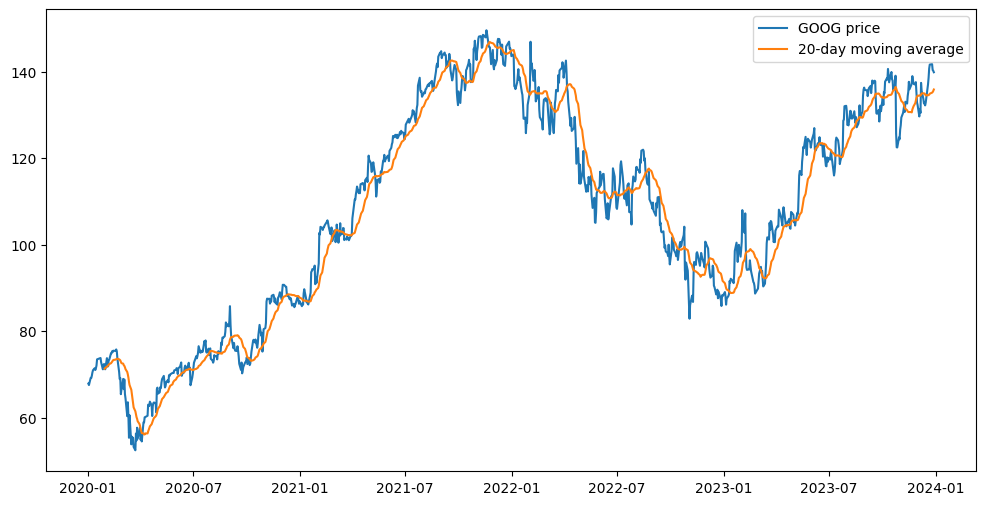

In [58]:
#plotting

#figure 1
plt.figure(figsize=(12,6))
plt.plot(prices, label="GOOG price")
plt.plot(prices.rolling(20).mean(), label="20-day moving average")
plt.legend()
plt.show()

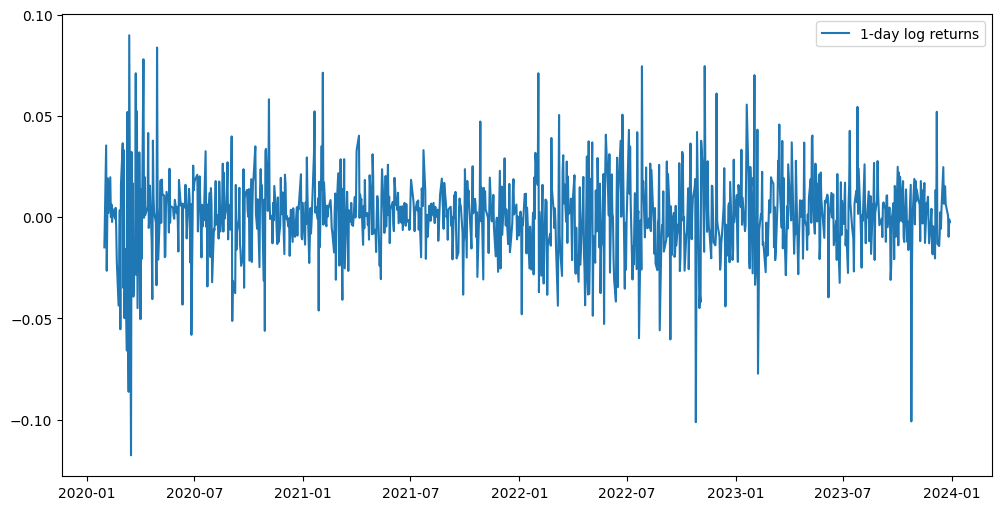

In [59]:
#figure 2
plt.figure(figsize=(12,6))
plt.plot(log_returns["1-day"], label="1-day log returns")
plt.legend()
plt.show()

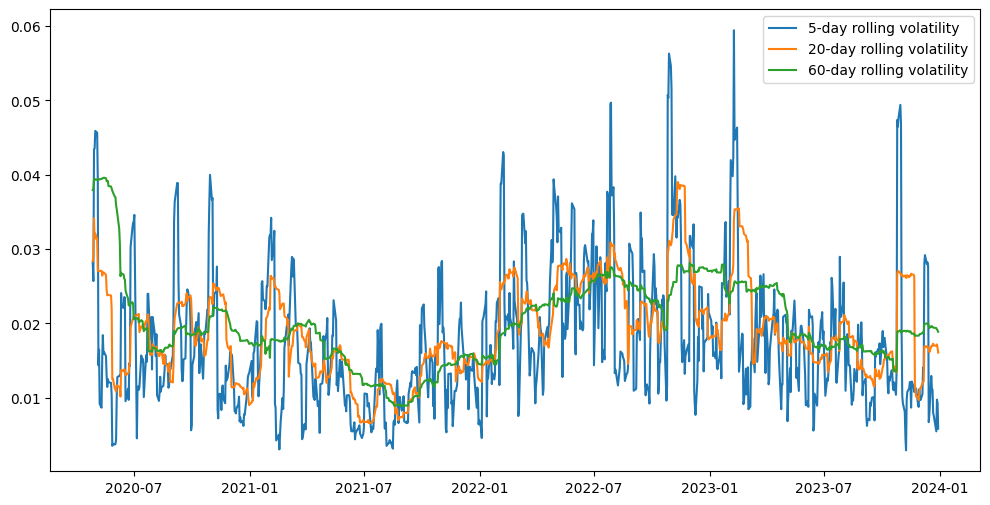

In [60]:
#figure 3

plt.figure(figsize=(12,6))
plt.plot(volatility["5-day"], label= "5-day rolling volatility")
plt.plot(volatility["20-day"], label= "20-day rolling volatility")
plt.plot(volatility["60-day"], label= "60-day rolling volatility")
plt.legend()
plt.show()

### Analysis

To-do

In [61]:
#Bonus maybe

## Task 3 - Stationarity
* Select **one asset** (Long Term).
* Compute the **Rolling Mean** and **Rolling Standard Deviation** of log returns with window sizes `20, 60, 120`.
* Plot them and visually inspect.
    * Does the mean stay constant? (Stationary mean)
    * Does the variance stay constant? (Stationary variance)
* Run an **Augmented Dickey-Fuller (ADF) Test** on the log return series.
    * Library: `from statsmodels.tsa.stattools import adfuller`
    * *Goal:* Interpret the p-value. The Null Hypothesis ($H_0$) is that the series is non-stationary (has a unit root). If p-value < 0.05, we reject $H_0$.
    * For learning about hypothesis testing and p-value you can refer to CS215 slides or other standard resources mentioned in READMEs.

In [62]:
#asset is GOOG

prices = prices_long["GOOG"]
log_ret = np.log(prices).diff().dropna()

rolling_mean = pd.DataFrame({
    "20-day": log_ret.rolling(20).mean(),
    "60-day": log_ret.rolling(60).mean(),
    "120-day": log_ret.rolling(120).mean()
})

rolling_std = pd.DataFrame({
    "20-day": log_ret.rolling(20).std(),
    "60-day": log_ret.rolling(60).std(),
    "120-day": log_ret.rolling(120).std()
})

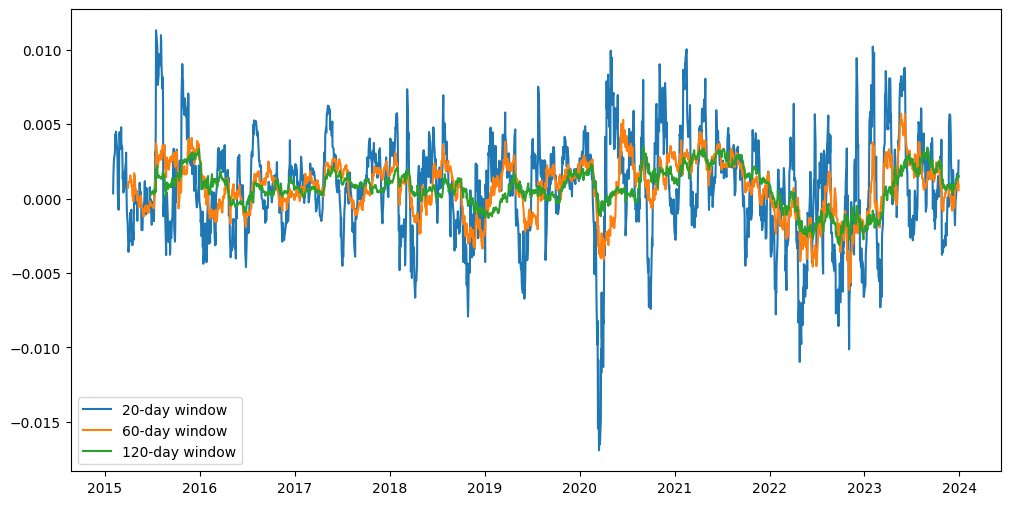

In [63]:
#plotting

#figure 1

plt.figure(figsize=(12,6))
plt.plot(rolling_mean["20-day"], label="20-day window")
plt.plot(rolling_mean["60-day"], label="60-day window")
plt.plot(rolling_mean["120-day"], label="120-day window")
plt.legend()
plt.show()

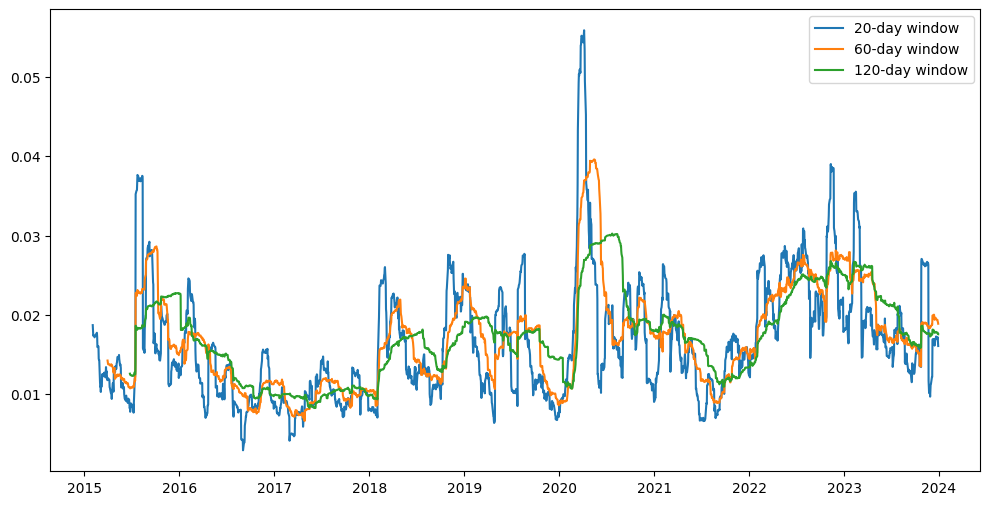

In [64]:
#figure 2

plt.figure(figsize=(12,6))
plt.plot(rolling_std["20-day"], label="20-day window")
plt.plot(rolling_std["60-day"], label="60-day window")
plt.plot(rolling_std["120-day"], label="120-day window")
plt.legend()
plt.show()

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
adf_result = adfuller(log_ret)

print("ADF test statistic :", adf_result[0])
print("p-value from ADF test :", adf_result[1])
print("Various critical values :", adf_result[4])

ADF test statistic : -11.153386160590092
p-value from ADF test : 2.9059849999018926e-20
Various critical values : {'1%': np.float64(-3.433271377163239), '5%': np.float64(-2.862830583359174), '10%': np.float64(-2.5674570385802222)}


### yap?

to do

## Task 4 - Volatility Regimes
We try to study the trend in volatility more deeply. From the ACF/PACF plot we know that volatility tends to cluster that is the market is either in a high volatility state (greater daily fluctuations) or low volatility state (stable prices, quiet markets).

Formally we can treat volatility as a *conditional standard deviation of returns*, conditioned on the history observed so far. We *cannot* predict *true* volatility for a given day based on the single return value, hence we try to estimate it using the past information. For this we look at two indicators of volatility:

1.  **Rolling Window Volatility:** Simple Moving Average (SMA) of standard deviation.
2.  **EWMA Volatility:** Exponentially Weighted Moving Average. This gives more weight to recent events. It is given by $\sigma_t^2 = (1-\lambda)r_t^2 + \lambda \sigma_{t-1}^2$.

**Steps:**
* Pick an asset and use data covering the **Feb-Mar 2020 COVID crash**.
* Compute two volatility estimates on the Log Returns:
    1.  **Rolling 20-day Volatility:** Standard deviation over a 20-day window.
    2.  **EWMA Volatility (RiskMetrics):** Use a decay factor $\lambda = 0.94$.
        * *Hint:* In pandas `df.ewm()`, the parameter `alpha` corresponds to $1 - \lambda$. So, use `alpha=0.06`.
* **Analysis:**
    * Plot both estimates on the same chart.
    * Which is smoother?
    * Which estimator reacts faster to the sudden crash in March 2020?
    * Which one would you prefer for risk management?
* **Regime Detection:** Compute the 60th percentile of your EWMA volatility series. Shade the regions on the plot where volatility exceeds this level.

* **Bonus:** A good volatility model "standardizes" the returns well. Calculate $z_t = r_t / \hat{\sigma}_t$. If the model is good, $z_t$ should have $Var \approx 1$. Check the variance of $z_t$ and plot its histogram.

In [67]:
start = "2020-01-01" 
end = "2020-06-01"
data = yf.download("GOOG", start=start, end=end, auto_adjust=False)
prices = data["Adj Close"].ffill().bfill()

log_rets = np.log(prices).diff().dropna()

rolling_20_vol = log_rets.rolling(20).std()
ewma_vol = np.sqrt(log_rets.pow(2).ewm(alpha = 0.06, adjust = False).mean())

[*********************100%***********************]  1 of 1 completed


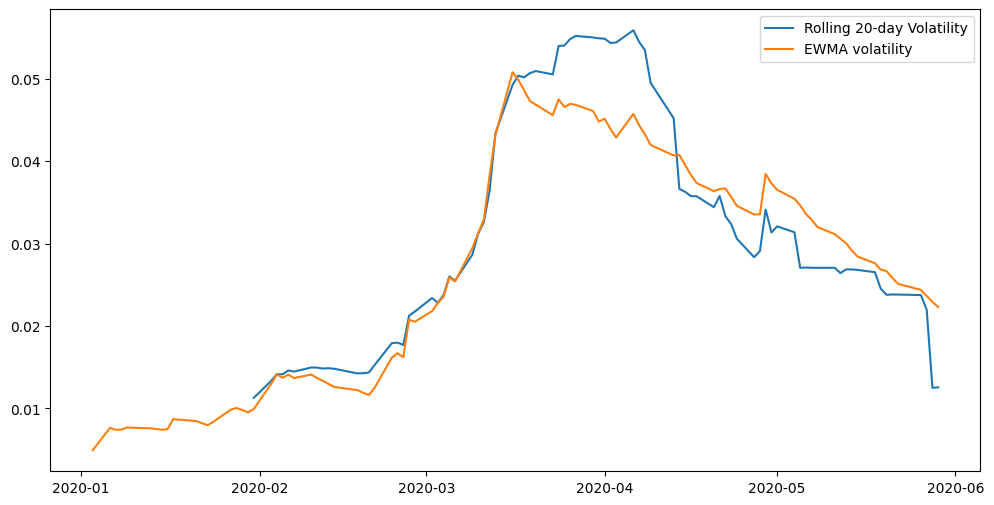

In [68]:
#plotting

plt.figure(figsize=(12,6))
plt.plot(rolling_20_vol, label = "Rolling 20-day Volatility")
plt.plot(ewma_vol, label = "EWMA volatility")
plt.legend()
plt.show()

### more yap maybe?

to do

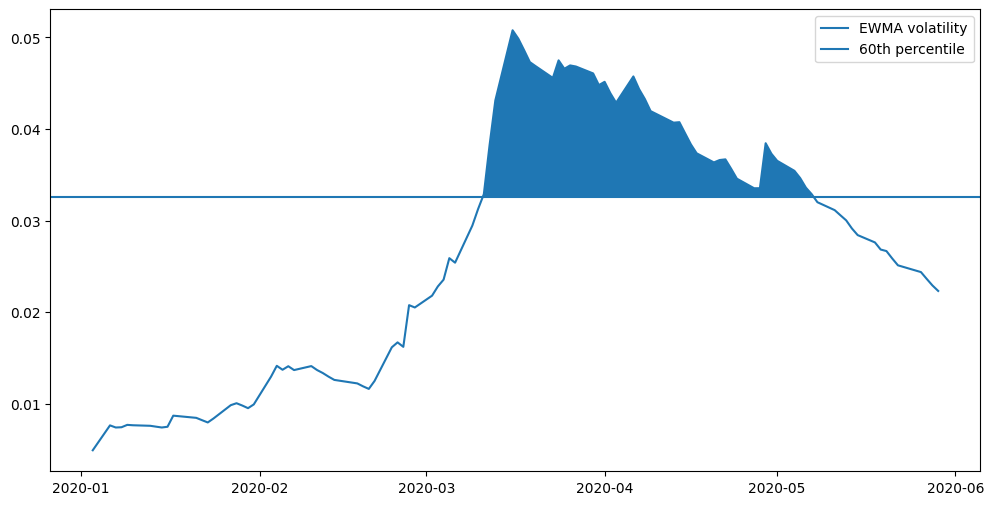

In [112]:
limit = ewma_vol.quantile(0.60).item()
x = ewma_vol.index.to_numpy()
y = ewma_vol.to_numpy().flatten()
where = y > limit

plt.figure(figsize=(12,6))
plt.plot(ewma_vol, label = "EWMA volatility")
plt.axhline(limit, linestyle = "-", label= "60th percentile")
plt.fill_between(
    x,
    y,
    limit,
    where = where
)
plt.legend()
plt.show()

In [113]:
#bonus maybe?? :P

## Task 5 - Time Horizons and the "Normal" Illusion
Short-term markets are noisy and dangerous (fat tails), while long-term data looks smoother. We can prove this statistically using **Skew** and **Kurtosis**.

**Theory:**
* **Skewness:** Measures asymmetry. (Negative skew = frequent small gains, few extreme losses).
* **Kurtosis:** Measures "tailedness". (High kurtosis = frequent extreme events/crashes).
* **Normal Distribution:** Skew $\approx 0$, Kurtosis $\approx 3$ (or Excess Kurtosis $\approx 0$).

**Steps:**
1.  Take your **Long Term** data for one asset (e.g., NVDA or TSLA).
2.  Resample the prices to get **Weekly** and **Monthly** closes.
    * Use `df['Adj Close'].resample('W').last()` and `...resample('M').last()`.
3.  Compute Log Returns for all three series: Daily, Weekly, Monthly.
4.  **The Test:**
    * Calculate **Skew** and **Kurtosis** for each of the three return series.
    * *Question:* How do these values change as the time horizon increases? Do they get closer to 0 and 3?
5.  **Visualization:**
    * Plot the **Histograms** of the Daily returns vs. Monthly returns on the same plot.
    * *Tip:* You will need to standardize them (subtract mean, divide by std dev) to overlay them meaningfully.
    * *Observation:* Look at the tails. Which one has "fatter" tails (more extreme outliers)?

**Key Takeaway:**
Daily returns often violate the "Normal Distribution" assumption used in many financial models. Long-term returns fit it better. This is called *Aggregational Gaussianity*.

**Bonus:** This is a direct application of a simple yet well-known result in asymptotic statistics. Can you find out what it is and state how it explains this observation?

In [ ]:
# ____________________
#< we shall take nvda >
# --------------------
#        \   ^__^
#         \  (oo)\_______
#            (__)\       )\/\
#                ||----w |
#                ||     ||

data = yf.download("NVDA", start="2015-01-01", end="2024-01-01", auto_adjust=False)
prices = data["Adj Close"].ffill().bfill()

prices_w = prices.resample('W').last()
prices_m = prices.resample('ME').last()

ret_d = np.log(prices).diff().dropna()
ret_w = np.log(prices_w).diff().dropna()
ret_m = np.log(prices_m).diff().dropna()

skew_d = st.skew(ret_d)
skew_w = st.skew(ret_w)
skew_m = st.skew(ret_m)

kurt_d = st.kurtosis(ret_d, fisher = False)
kurt_w = st.kurtosis(ret_w, fisher = False)
kurt_m = st.kurtosis(ret_m, fisher = False)

[*********************100%***********************]  1 of 1 completed


array([3.60216522])

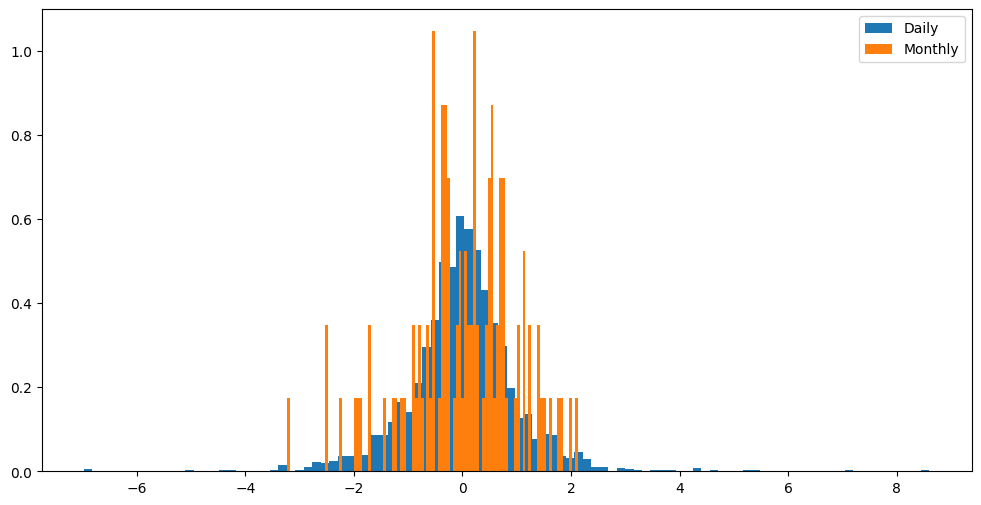

In [132]:
#plotting time

std_d = st.zscore(ret_d)
std_m = st.zscore(ret_m)

plt.figure(figsize=(12,6))
plt.hist(std_d, bins=100, density=True, label = "Daily")
plt.hist(std_m, bins=100, density=True, label = "Monthly")
plt.legend()
plt.show()

### more yap

to do

## Task 6 - Smart investing
Calculate how many **RTX 4090s** (approx. price $1,600$) you could afford *today* if you had invested **$1,000** in NVIDIA on the day you were born.

In [154]:
birth_date = pd.to_datetime("2007-01-11")
initial = 1000
gpu_value = 1600

data = yf.download("NVDA", start="2007-01-01", progress= False, auto_adjust= False)
prices = data["Adj Close"].ffill().bfill()

cost_price = prices.loc[birth_date]
shares = initial/cost_price

sell_price = shares * prices.iloc[-1]

gpus = sell_price/gpu_value

gpus

Ticker
NVDA    212.897893
dtype: float64